In [80]:
# from src.berlin_map import edges
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [98]:
edges = [
    ["A", "B", 2],
    ["B", "C", 4],
    ["C", "D", 1],
    ["B", "E", 3],
    ["C", "E", 3]
]

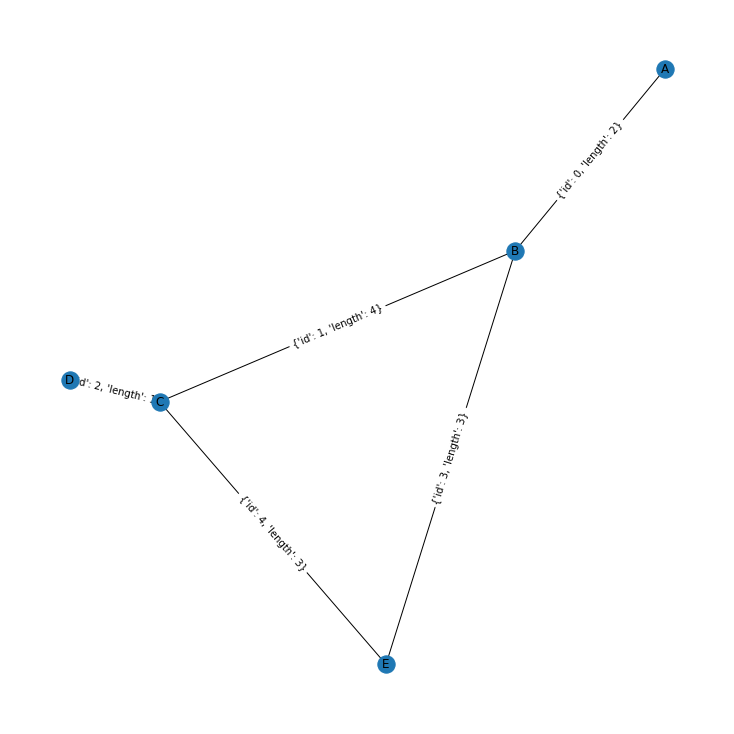

In [99]:
G = nx.Graph()
for id, (u, v, length) in enumerate(edges):
    G.add_edge(u, v, id=id, length=length)

plt.figure(figsize=(10, 10))

pos = nx.kamada_kawai_layout(G, weight="length")
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos)

plt.show()

In [100]:
adj = np.zeros((len(G.edges), len(G.edges)))

for u, v, i in G.edges.data("id"):
    for node in [u, v]:
        for edge in G[node].values():
            adj[i, edge["id"]] += 1
adj = np.where(adj, 1, 0)

adj = adj - np.identity(adj.shape[0])
adj = adj / np.sum(adj, axis=1)

print(adj)

[[0.         0.25       0.         0.33333333 0.        ]
 [0.5        0.         0.5        0.33333333 0.33333333]
 [0.         0.25       0.         0.         0.33333333]
 [0.5        0.25       0.         0.         0.33333333]
 [0.         0.25       0.5        0.33333333 0.        ]]


In [101]:
eigvecs = np.linalg.eig(adj)[1]
pos_eigvecs = eigvecs[:, np.all(eigvecs >= 0, axis=0)]
pos_eigvecs /= np.sum(pos_eigvecs, axis=0)
pos_eigvecs

array([[0.14285714],
       [0.28571429],
       [0.14285714],
       [0.21428571],
       [0.21428571]])

In [102]:
try:
    A = pos_eigvecs[:, 0].reshape(-1)
except IndexError:
    print("no positive eigenvalues")

A

array([0.14285714, 0.28571429, 0.14285714, 0.21428571, 0.21428571])

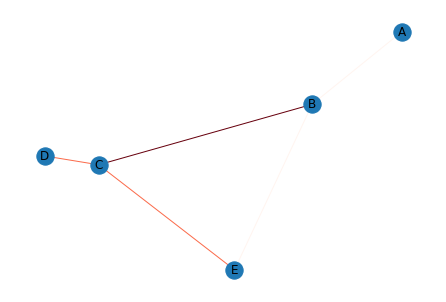

In [103]:
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    edge_color=A,
    edge_vmin=np.min(A),
    edge_vmax=np.max(A),
    edge_cmap=plt.get_cmap("Reds"),
)

In [104]:
eigvecs


array([[ 3.08606700e-01,  5.46012230e-01,  2.67261242e-01,
         3.40093734e-01, -4.08248290e-01],
       [ 6.17213400e-01, -7.49408644e-17,  5.34522484e-01,
         1.58849251e-18,  8.16496581e-01],
       [ 3.08606700e-01, -5.46012230e-01,  2.67261242e-01,
        -3.40093734e-01, -4.08248290e-01],
       [ 4.62910050e-01,  4.49300172e-01, -5.34522484e-01,
        -6.19948588e-01,  1.69045055e-16],
       [ 4.62910050e-01, -4.49300172e-01, -5.34522484e-01,
         6.19948588e-01, -3.61653505e-16]])